# INDIAN STARTUP ECOSYSTEM

## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market. 

## Scope of Work
Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap Analyze funding received by startups in india from 2018 to 2021.

## Hypotheses
H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector



## Questions
1. How does funding vary across different industry sectors in India?

2. How does funding vary with the location of the start-ups

3. What is the relationship between the amount of funding and the stage of the company?

4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?
7. Who were the most active investors?

### DATA EXPLORATION, DATA UNDERSTANDING and DATA ANALYSIS

In [179]:

# LOADING LIBRARIES


# For data manipulation
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#For statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# for database connection
import pyodbc
from dotenv import dotenv_values
import os

# Filter warnings
import warnings
warnings.filterwarnings("ignore")
print("loading complete")



loading complete


# 1. Loading and Inspection of Data
Loading data from SQL server

In [180]:
##Loading environment variables from .env files 
environment_variables = dotenv_values(".env")

##Getting values of the credentials set in the .env file
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
username = os.getenv("USERNAME")
password = os.getenv("PASSWORD")

##Constructing the connection string
connection_string = f"DRIVER=SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [181]:
connection = pyodbc.connect(connection_string)

In [182]:
##sql query to retrieve data from the table LP1_startup_2020
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

##sql query to retrieve data from table LP1_startup_funding2021
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

##execute the sql query and load into pandas DataFrame
data_2020 = pd.read_sql(query_2020,connection)
data_2021 = pd.read_sql(query_2021,connection)

In [183]:


data_2020['year'] = 2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [184]:
# overview of the 2020 dataset
data_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [185]:
data_2021['year'] = 2021
data_2021.head ()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [186]:
# overview of the 2021 dataset
data_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


# 2.Loading CSV Files 

In [187]:

data_2019 = pd.read_csv(r"C:\Users\USER\Desktop\LP1-Dubnium2\startup_funding2019.csv")

data_2019['year'] = 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [188]:
# overview of the 2019 dataset
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [189]:
data_2018 = pd.read_csv(r"\Users\USER\Desktop\LP1-Dubnium2\startup_funding2018.csv")
data_2018['year'] = 2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy farmers in rural Maharashtra.,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.,2018


In [190]:
# overview of 2018 dataset
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


 #### Displaying Datasets columns

In [191]:
print("columns for 2021_dataset:","\n",data_2021.columns)
print("columns for 2020_dataset:","\n",data_2020.columns)
print("columns for 2019_dataset:","\n",data_2019.columns)
print("columns for 2018_dataset:","\n",data_2018.columns)

columns for 2021_dataset: 
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year'],
      dtype='object')
columns for 2020_dataset: 
 Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10', 'year'],
      dtype='object')
columns for 2019_dataset: 
 Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'year'],
      dtype='object')
columns for 2018_dataset: 
 Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'year'],
      dtype='object')


### Issues within the Data
1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

### Course of Action 
1. Missing Column Engineering for 2018:
---> We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

2. Column Name Standardization:
---> To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

3. Extraneous Column Removal in 2020:
---> The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process.

#### Concatinating our datasets i.e data_2021, data_2020, data_2019, data_2018

In [192]:
def concat_dataframes(data_2020,data_2021,data_2018,data_2019):
    """
    Concatenates four dataframes along the row axis.
 
    Parameters:
    data_2020 (pandas.DataFrame): The first dataframe to concatenate.
    data_2021 (pandas.DataFrame): The second dataframe to concatenate.
    LP1_dataset (pandas.DataFrame): The third dataframe to concatenate.
    LP2_dataset (pandas.DataFrame): The fourth dataframe to concatenate.
 
    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data_2020.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df2 = data_2021.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df3 = data_2019.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series'})
    df4 = data_2018.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series'})
 
    # Concatenate dataframes along the row axis
    result = pd.concat([df1,df2,df3,df4], axis=0)
 
    return result

In [193]:
## combined dataset (df)
df = concat_dataframes(data_2020,data_2021,data_2018,data_2019)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [194]:
# overview of combined dataset(2018-2021)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 525
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   series         1941 non-null   object 
 9   column10       2 non-null      object 
 10  year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [195]:
df.shape

(2879, 11)

In [196]:
df.describe()

,founded,year
count,2110.000000,2879.000000
mean,2016.079621,2020.023619
std,4.368006,1.086974
min,1963.000000,2018.000000
25%,2015.000000,2020.000000
50%,2017.000000,2020.000000
75%,2019.000000,2021.000000
max,2021.000000,2021.000000


In [197]:
df.describe(include='all')

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,column10,year
count,2879,2110.000000,2765,2861,2879,2334,2253,2622,1941,2,2879.000000
unique,2214,NaN,172,873,2691,1980,1777,774,75,2,NaN
top,BharatPe,NaN,Bangalore,FinTech,Provides online learning classes,Byju Raveendran,Inflection Point Ventures,—,Seed,Pre-Seed,NaN
freq,10,NaN,764,173,5,7,36,148,606,1,NaN
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.023619
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086974
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


In [198]:
df.isna().sum()

company_brand       0
founded           769
headquarter       114
sector             18
about_company       0
founders          545
investor          626
amount            257
series            938
column10         2877
year                0
dtype: int64

In [199]:
df.duplicated().sum()

23

In [200]:
df.nunique()

company_brand    2214
founded            34
headquarter       172
sector            873
about_company    2691
founders         1980
investor         1777
amount            774
series             75
column10            2
year                4
dtype: int64

#### OBSERVATION

Issues with the data
1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

##### Course of Action:
 **1. Missing Column Engineering for 2018:**
---> We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

**2. Column Name Standardization:**
---> To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

**3. Extraneous Column Removal in 2020:**
---> The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process. ical process

**BUSINESS QUESTIONS**

1. Which industries/sectors have the largest funding?
2. Who are the top ten competitors with the largest funding?
3. Who are the top investors?(frequency)
4. Which year was funds allocated the most?
5. Which is the largest headquaters for startup business in India?
6. What is the average funds granted to startups?

BUSINESS QUESTIONS

1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?
 

## DATA PREPARATION AND CLEANING ##

In [201]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

In [202]:
df = df.reset_index(drop=True)

In [203]:
df.tail ()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,column10,year
2874,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specifically for small and medium businesses in India.",NaN,NaN,225000000,Series C,NaN,2018
2875,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,—,Series A,NaN,2018
2876,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.,NaN,NaN,7500,Seed,NaN,2018
2877,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop software to service a range of industry requirements.,NaN,NaN,"₹35,000,000",Seed,NaN,2018
2878,Netmeds,NaN,"Chennai, Tamil Nadu, India","Biotechnology, Health Care, Pharmaceutical",Welcome to India's most convenient pharmacy!,NaN,NaN,35000000,Series C,NaN,2018


In [204]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

In [205]:
#create a list of the wrong entries
## Pharmaceuticals - index 1297, 1311 (this is duplicated) start from end to forward
## Online Media - index 2155 (this is duplicated) start from end to forward
## Computer Games - index 1153  ( this is duplicated ) start from end to forward , replace with none 
## Information Technology & Services - index 2231 
## Food & Beverages index 1296,1310     (this is duplicated) change sector and  HQ

In [206]:
def swap_row_cells(df, row_index, col1_index, col2_index):
    """
    Swaps the values in the given columns and row of a data array.

    Parameters:
    df (list): A 2D list representing the data array.
    row_index (int): The index of the first column.
    col1_index (int): The index of the second column.
    col2_index (int): The index of the row where the values are swapped.

    Returns:
    list: The modified data array with swapped values.
    """
    df.loc[row_index, [col1_index,col2_index]] = df.loc[row_index,[col2_index,col1_index]].values
    
    return df.head()

In [207]:
# correcting all the cells with wrong entries
#### row index 2155 
swap_row_cells(df, 2155, 'investor', 'amount')
swap_row_cells(df, 2155, 'founders', 'investor')
swap_row_cells(df, 2155, 'about_company', 'founders')
swap_row_cells(df, 2155, 'sector', 'about_company')
swap_row_cells(df, 2155, 'headquarter', 'sector')

#### row index 1312
swap_row_cells(df, 1312, 'amount', 'series')
swap_row_cells(df, 1312, 'investor', 'amount')
swap_row_cells(df, 1312,'founders', 'investor')
swap_row_cells(df, 1312,'about_company', 'founders')
swap_row_cells(df, 1312,'sector', 'about_company')

#### row index 1297
swap_row_cells(df,1297,'amount', 'series' )
swap_row_cells(df,1297,'investor', 'amount' )
swap_row_cells(df, 1297, 'founders', 'investor')
swap_row_cells(df, 1297, 'about_company', 'founders')
swap_row_cells(df, 1297, 'sector', 'about_company')
swap_row_cells(df,1297, 'headquarter', 'sector')
### row index 1311
swap_row_cells(df, 1311, 'amount', 'series')
swap_row_cells(df, 1311, 'investor', 'amount')
swap_row_cells(df, 1311, 'founders', 'investor')
swap_row_cells(df, 1311, 'about_company', 'founders')
swap_row_cells(df, 1311, 'sector', 'about_company')
swap_row_cells(df, 1311, 'headquarter', 'sector')

#### row index 1296
swap_row_cells(df, 1296, 'headquarter', 'sector')

#### row index 2231
swap_row_cells(df, 2231, 'headquarter', 'sector')

#### row index 1310
swap_row_cells(df, 1310, 'headquarter', 'sector')

#### row index 1593
swap_row_cells(df, 1593, 'amount', 'series')

#### row index 1600
swap_row_cells(df, 1600, 'amount', 'series')
swap_row_cells(df, 1600, 'investor', 'amount')

### row index 1606
swap_row_cells(df, 1606, 'amount', 'series')

#### row index 1732
swap_row_cells(df, 1732, 'amount', 'series')

#### row index 2203
swap_row_cells(df , 2203, 'amount', 'series')
swap_row_cells(df ,2203, 'investor', 'amount')
#### row index 1153
swap_row_cells(df, 1153, 'amount', 'series')

#### row index 1166
swap_row_cells(df, 1166, 'amount', 'series')

### row index 1729
swap_row_cells(df, 1729, 'amount', 'series')



# replace computer games with none 
df['headquarter'] = df['headquarter'].replace('Computer Games', None)


#### DATA CLEANING ON EACH COLUMN

In [208]:
#check for missing values
print(f" There are {df['company_brand'].isnull().sum()} missing values")

 There are 0 missing values


In [209]:
df['company_brand'].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', ..., 'Mombay',
       'Droni Tech', 'Netmeds'], dtype=object)

In [210]:
# check for duplicates and unique company names
df['company_brand'].unique
print(f" There are {df['company_brand'].duplicated().sum()} duplicates")

 There are 665 duplicates


### 2. Founded

In [211]:
# there are missing years in the dataset 
print(f" There are {df['founded'].isna().sum()} missing values")

# check the data type
print(f"The column is a {df['founded'].dtype} data type")

 There are 769 missing values
The column is a float64 data type


Since there are companies with unique names but dealing in different sectors we wont alter the duplicates.

The column company brand is cleaning

#### COURSE OF ACTION

---> We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data.

---> We will also be converting the data type from float to datetime for purpose of our analysis.

In [212]:
df["founded"].interpolate(method='linear',inplace= True)

print(f"There are {df['founded'].isna().sum()} missing values")

There are 0 missing values


In [213]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')

#### 3. Headquater

In [214]:
df['headquarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [215]:
print(f"there are {df['headquarter'].isnull().sum()} missing values")

there are 119 missing values


Observation

---> There are companies which have unidentified locations and have been placed as none.

----> There are wrong entries in the column

---> Clean the locations with only the city for accurate analysis.

Course of action

----> Since there are companies where their location is unidentified as none we will fill the missing values with none.
----> split the long locations with one location.

----> assess the wrong entries and place a function that returns the orginal data into the column.

In [216]:
def clean_replace(dataframe,column_name):
    dataframe[column_name] = dataframe[column_name].replace('-', np.nan)
    #clean the nan values with none
    dataframe[column_name] = dataframe[column_name].fillna(value='None')

    return df.head()

In [217]:
clean_replace(df,"headquarter")

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge",340000.0,None,2020


In [218]:
print(f"There are {df['headquarter'].isnull().sum()} missing values")

There are 0 missing values


In [219]:
df['headquarter']= df['headquarter'].str.split(',').str[0].str.replace("'","", regex=True)
df['headquarter'] = df['headquarter'].str.strip('\t#REF!')

In [220]:
df['headquarter']=df['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad' ,'Small Towns': 'Small Towns','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Bangaldesh': 'Bangladesh',}) 

### 4. Sector

In [221]:
df["sector"].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [222]:
print(f" There are {df['sector'].isnull().sum()} missing values")

 There are 19 missing values


#### Observation

----> There are unidentified sectors/industries which have none

----> There are unidentified sectors that need to be replaced with actual industry names

Course of action

----> We will be replacing the missing values with none to show some companies have unidentified industry they are in.

----> Replace the unidentified names with industry names

In [223]:
clean_replace(df, 'sector')
print(f" There are {df['sector'].isna().sum()} missing values")

 There are 0 missing values


In [224]:
df['sector']= df['sector'].str.split(',').str[0].str.replace("'","", regex=True)

In [225]:
# there are certain sectors which are not defined well so we need to replace them with actual sectors
# create a list :
## Android - 
## Helathcare
## crowd funding
## heath care
## wellness
## basketball 
## catering 
## cooking


df['sector'].replace('Android','Edtech', inplace=True)
df['sector'].replace('Crowdfunding', 'Crowdsourcing', inplace=True)
df['sector'].replace('Wellness', 'HealthCare',inplace=True)
df['sector'].replace('Basketball', ' Apps', inplace=True)
df['sector'].replace('Catering', 'Food Delivery', inplace=True)
df['sector'].replace('Cooking', 'Food Delivery',inplace=True)
df['sector'] = df['sector'].replace({'Edtech': 'EdTech', 
                                               'Fintech': 'FinTech', 
                                               'Agriculture': 'AgriTech', 
                                               'Food & Beverages': 'Food and Beverages',
                                               'Financial Services': 'FinTech',
                                                'Healthcare': 'HealthTech', 'HealthTech': 'HealthTech', 'Medical': 'HealthTech','Medtech': 'HealthTech', 'Pharmaceutical': 'HealthTech', 
                                                'Health Insurance': 'HealthTech','Biotechnology': 'HealthTech', 'Health Diagnostics': 'HealthTech', 
                                                'Hospital': 'HealthTech','Hospital & Health Care': 'HealthTech', 'Wellness': 'HealthTech', 
                                                'Dental': 'HealthTech','Alternative Medicine': 'HealthTech', 'Nutrition': 'HealthTech', 
                                                'Fitness': 'HealthTech','Mental Health': 'HealthTech', 'Healthcare/Edtech': 'HealthTech',
                                                'Life sciences': 'HealthTech', 'Biotech': 'Healthcare', 'Nutrition Tech': 'HealthTech','E-mobility': 'HealthTech', 
                                                'Med Tech': 'HealthTech', 'FemTech': 'HealthTech','Cannabis startup': 'HealthTech', 'Pharmacy': 'HealthTech', 'Medical Device': 'HealthTech',
                                                'BioTechnology': 'HealthTech', 'Fertility tech': 'HealthTech', 'Ayurveda tech': 'HealthTech','E-tail': 'Healthcare', 'E store': 'E-Commerce', 'E-store': 'Healthcare', 
                                                'Telemedicine': 'Healthcare','HealthCare': 'HealthTech',
                                                'AI startup': 'AI', 
                                                'Information Services': 'InfoTech','Healthtech': 'HealthTech',
                                                'Finance': 'FinTech', 'Health Care': 'HealthTech',
                                                'Logistics & Supply Chain': 'Logistics', 
                                                'Food Industry': 'FoodTech', 'Foodtech': 'FoodTech', 
                                                'SaaS startup': 'SaaS', 'Health': 'HealthTech', 
                                                'Ecommerce': 'E-Commerce','Tech Startup': 'Tech', 
                                                'Mobility': 'Transportation', 'SaaS': 'Tech', 'Artificial Intelligence': 'AI',
                                                'Food and Beverage': 'Food and Beverages', 
                                                'Information Technology': 'InfoTech','Internet': 'Tech', 'Apps': 'Tech', 'Computer Software': 'Tech', 
                                                'E-commerce': 'E-Commerce','Agritech': 'AgriTech', 'Hospital & Health Care': 'HealthTech', 'Food': 'Foodtech', 
                                                'Cosmetics': 'Consumer Goods','Tech company': 'Tech', 
                                                'Automobile': 'Automotive', 'Apparel & Fashion': 'Fashion', 'Education': 'EdTech',
                                                'Social Media': 'Media', 'Digital Media': 'Media', 'IT': 'InfoTech', 'IoT': 'AI','Software': 'Tech', 
                                                'Industrial Automation': 'AI', 'Technology': 'Tech','Information Technology & Services': 'InfoTech & Services', None: 'Unknown'})

#### 5. About_Company

In [226]:
df["about_company"].unique()


array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste', ...,
       'Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.',
       'Droni Tech manufacture UAVs and develop software to service a range of industry requirements.',
       "Welcome to India's most convenient pharmacy!"], dtype=object)

In [227]:
print(f"There are {df['about_company'].isnull().sum()} missing values")

There are 0 missing values


### 6. Founders 

In [228]:
df['founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya', ...,
       'Pavan Kushwaha', 'Jeevan Chowdary M, Harshit Harchani',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta'],
      dtype=object)

In [229]:
df['founders'].isnull().sum()

545

In [230]:
clean_replace(df, 'founders')
print(f" There are {df['founders'].isna().sum()} missing values")

 There are 0 missing values


In [231]:
# strip off characters 
df['founders'] = df['founders'].str.strip('\t#REF!')

### 7. Investors

In [232]:
df['investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [233]:
print(f" There are {df['investor'].isnull().sum()} missing values")

 There are 628 missing values


There are 628 missing values
Observation

---> There are unidentified investors and there are some with not applicable(nan). ---> There are missing values in the column

Course of action

----> We will be replacing the missing values with none

----> Change the nan and replace with none.

In [234]:
clean_replace(df, 'investor')

print(f" There are {df['investor'].isna().sum()} missing values")

 There are 0 missing values


In [235]:
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('nan', 'None', regex=True)
df.loc[:, 'investor'] = df.loc[:, 'investor'].replace('http://100x.vc/', 'None', regex=True)
df['investor']= df['investor'].str.split(',').str[0].str.replace("'","", regex=True)
df['investor'] = df['investor'].str.strip('\t#REF!')

### 8. Amount

In [236]:
df['amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

In [237]:
print(f"There are {df['amount'].isna().sum()} missing values")

There are 255 missing values


Observation

----> The amount column has rupies and dollar currency. ----> There is a shuffle of row cells between the stage and amount ----> There are missing values in the column

Course of action

---> We will be changing the currency of the amount to dollar ---> We will also fill the missing values with 0 ---> We will be changing the currency to dollar

In [238]:
# Remove dollar sign
df['amount'] = df['amount'].replace('\$', '', regex=True)

# Remove commas
df['amount'] = df['amount'].str.replace(',', '')

# Remove all other irrelevant characters, words and symbols
df['amount'] = df['amount'].replace(["Upsparks", 'undisclosed', 'Undisclosed',
 ',' ], '')

# strip off characters 
df['amount'] = df['amount'].str.strip('\t#REF!')

df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
# Convert the 'amount($)' column to numeric
df['amount'] = pd.to_numeric(df['amount'])


##### 9. SERIES
Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.

Pre-Seed Funding
Entrepreneurial idea in early development; small funds needed; limited informal channels for raising funds.

Seed Funding
First official equity funding; investors provide funds for equity ownership.

Series A Financing
First venture capital round; developed product, consistent revenue, long-term profit plan.

Series B Financing
For established startups; substantial user base and revenue; funding for expansion.

Series C and Beyond
Optional rounds for final push before IPO or unmet objectives; Series C is the third venture capital round.

Initial Public Offering (IPO)
Process of offering corporate shares to the public; used for funding or divestment.

link: https://www.startupindia.gov.in/content/sih/en/funding.html



In [239]:
# Cleaning stage column
df['series'].unique()
df['series']=df['series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.NaN)

In [240]:
# Standardize funding stages in the 'stage' column
df['series'] = df['series'].replace(['Series A', 'Seies A', 'Series A-1', 'Series A2', 'Series A+', 'Series A+'], 'Series A')
df['series'] = df['series'].replace(['Pre-seed', 'Pre-seed Round', 'Pre seed Round', 'Pre seed round'], 'Pre-Seed Stage')
df['series'] = df['series'].replace(['Pre series A', 'Pre-series A', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre- series A'], 'Pre series A')
df['series'] = df['series'].replace(['Series B', 'Series B+', 'Series B2', 'Series B3'], 'Series B')
df['series'] = df['series'].replace(['Series C', 'Series C', 'Series C, D','Series C', 'Private Equity','PE', 'Post-IPO Equity','Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I','Series D1','Series F2', 'Series F1'], 'Series C and Beyond')
df['series'] = df['series'].replace(['Venture - Series Unknown', None,'Grant','Debt','Debt Financing','Post-IPO Debt','Non-equity Assistance','Bridge','Bridge Round','Fresh funding','Funding Round','Mid series','Edge','ah! Ventures','ITO Angel Network LetsVenture','JITO Angel Network LetsVenture'], 'unknown')
df['series'] = df['series'].replace(['Corporate Round','Undisclosed','Secondary Market','Pre-series','Post series A','Pre-series B','Pre-Series B','Pre series B','Pre-series C','Pre series C'], 'Other Stages')
df['series'] = df['series'].replace(['Seed','Seed funding','Pre-Seed','Angel', 'Angel Round','Seed fund', 'Seed round', 'Seed A','Seed Funding', 'Seed Round & Series A', 'Series E2', 'Seed Round','Seed Investment','Seed+','Early seed'],'Seed Stage')

In [241]:
df['series'].value_counts()

series
unknown                            1051
Seed Stage                          748
Series A                            309
Pre series A                        292
Series C and Beyond                 234
Series B                            138
Pre-Seed Stage                       65
Other Stages                         38
Upsparks                              2
ITO Angel Network, LetsVenture        1
JITO Angel Network, LetsVenture       1
Name: count, dtype: int64

In [242]:
df['series'].isna().sum()

0

In [243]:
# strip off characters 
df['series'] = df['series'].str.strip('\t#REF!')

#### 10. Year

In [244]:
df['year'].dtype

dtype('int64')

In [245]:
# # Convert the data_year column to date
df['year']=pd.to_datetime(df['year'], format='%Y')
df['year']=df['year'].dt.to_period('y')
# # df['founded']=pd.to_datetime(df['founded']).dt.year

#### General Cleaning

In [246]:
df[df.duplicated()]


,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by improving the productivity of Indian cattle with better quality feed.,Nikhil Bohra,ajasthan Venture Capital Fund,NaN,Seed Stage,2020
205,Nykaa,2012,Mumbai,Consumer Goods,Nykaa is an online marketplace for different beauty and wellness products.,alguni Nayar,Alia Bhatt,NaN,unknown,2020
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tutoring firm,Byju Raveendran,Owl Ventures,NaN,unknown,2020
367,Zomato,2008,Haryana,Food devlivery,Get online food delivery from restaurants near you,"Deepinder Goyal, Pankaj Chaddah",MacRitchie Investments,NaN,unknown,2020
813,Nykaa,2012,Mumbai,E-Commerce,Deals in cosmetic and wellness products,alguni Nayar,Steadview capital,NaN,unknown,2020
963,Vogo,2016,Bangalore,Automotive,A scooter-sharing platform allowing users to rent a two-wheeler from specific designated pick up points,"Anand Ayyadurai, Padmanabhan Balakrishnan, Sanchit Mittal",Lightstone Aspada,NaN,Series C and Beyond,2020
1009,Bounce,2014,Bangalore,Automotive and Rentals,Offers a variety of bikes and scooters that can be rented on a subscription basis,"Vivekananda Hallekere, Anil Giri Raju,Arun Agni",Accel Partners,NaN,Series C and Beyond,2020
1162,Curefoods,2020,Bangalore,Food and Beverages,Healthy & nutritious foods and cold pressed juices produced in Edinburgh. Currently distributing wholesale within the Edinburgh region.,Ankit Nagori,Iron Pillar,13000000.0,unknown,2021
1164,Bewakoof,2012,Mumbai,Fashion,"Bewakoof is a lifestyle fashion brand that makes creative, distinctive fashion for the trendy, contemporary Indian.",Prabhkiran Singh,InvestCorp,8000000.0,unknown,2021
1166,FanPlay,2020,None,Computer Games,A real money game app specializing in trivia games,YC W21,Pritesh Kumar,1200000.0,Upsparks,2021


In [247]:
df.drop_duplicates(keep='first', inplace= True)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,NaN,unknown,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,NaN,Pre-Seed Stage,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-Seed Stage,2020
3,NCOME,2020,Delhi,Escrow,Escrow-as-a-service platform,itesh Tiwari,Venture Catalysts,NaN,unknown,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan",Siana Capital Management,NaN,unknown,2020


In [248]:
print(f" There are {df.duplicated().sum()} duplicates")

 There are 0 duplicates


In [249]:
column_list = df.columns.tolist()
print(column_list)

['company_brand', 'founded', 'headquarter', 'sector', 'about_company', 'founders', 'investor', 'amount', 'series', 'year']


### Statistical Analysis

### 1. Hypothesis Testing
Hypotheses 

H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector

We use t-test to test the hypotheses because there are only two groups to analyze. 

In [250]:
# Hypothesis testing using t-test method
Data = df

# Split the data into two groups based on the sector
group1 = df[df['sector'] == 'A']['amount']
group2 = df[df['sector'] == 'B']['amount']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Interpret the results
alpha = 0.05

if p_value < alpha:
    print("Reject null hypothesis. There is a significant relationship between funding and the sector.")
else:
    print("Fail to reject null hypothesis. No significant relationship between funding and the sector.")


print("p-value (numeric):", p_value_numeric)

Fail to reject null hypothesis. No significant relationship between funding and the sector.
p-value (numeric): -1.0


In [251]:
# Sectors in 'sector' column

sectors = df['sector'].unique()
print(sectors)

['AgriTech' 'EdTech' 'Hygiene management' 'Escrow' 'Networking platform'
 'FinTech' 'Crowdsourcing' 'Food & Bevarages' 'HealthTech'
 'Fashion startup' 'FoodTech' 'Food Delivery' 'Virtual auditing startup'
 'E-Commerce' 'Gaming' 'Work fulfillment' 'AI' 'Telecommunication'
 'Logistics' 'Tech' 'Sports' 'Retail' 'Tyre management' 'Cloud company'
 'Software company' 'Venture capitalist' 'Renewable player' 'IoT startup'
 'SaaS' 'Aero company' 'Marketing company' 'Retail startup'
 'Co-working Startup' 'Finance company' 'Solar Monitoring Company'
 'Video sharing platform' 'Gaming startup' 'Video streaming platform'
 'Consumer appliances' 'Blockchain startup' 'Conversational AI platform'
 'Real Estate' 'SaaS platform' 'AI platform' 'Fusion beverages' 'HR Tech'
 'Job portal' 'Hospitality' 'Media' 'Dairy startup' 'Content management'
 'Spacetech' 'Transportation' 'Trading platform' 'AI Company'
 'Photonics startup' 'Entertainment' 'Consumer Goods' 'Scanning app'
 'Skincare startup' 'Food and Beve

### Sector Mapping

In [252]:
full_data = pd.DataFrame(df)
 
# Define a mapping dictionary for sector grouping
sector_mapping = {
    'FinTech': 'Finance',
    'EdTech': 'Education',
    'E-commerce': 'Retail',
    'Tech company': 'Technology',
    'Edtech': 'Education',
    'Multinational conglomerate company': 'Conglomerate',
    'Automotive': 'Automotive',
    'Financial Services': 'Finance',
    'Hospitality': 'Hospitality',
    'Insurance': 'Finance',
    'Food Delivery, Food Processing, Internet': 'Food & Internet',
    'Innovation Management': 'Innovation',
    'Fintech': 'Finance',
    'Sports': 'Sports'
}
 
# Map the sectors based on the dictionary
full_data['Grouped_Sector'] = full_data['sector'].map(sector_mapping)
 
# Group by the new grouped sector column and sum the amounts
grouped_data = full_data.groupby('Grouped_Sector')['amount'].sum()
 
# Print the grouped and aggregated data
grouped_data

Grouped_Sector
Automotive      2.517665e+09
Conglomerate    0.000000e+00
Education       3.274743e+09
Finance         1.559647e+11
Hospitality     1.716800e+09
Innovation      1.000000e+09
Sports          8.420000e+08
Name: amount, dtype: float64

### Visualization of Aggregated Sectors

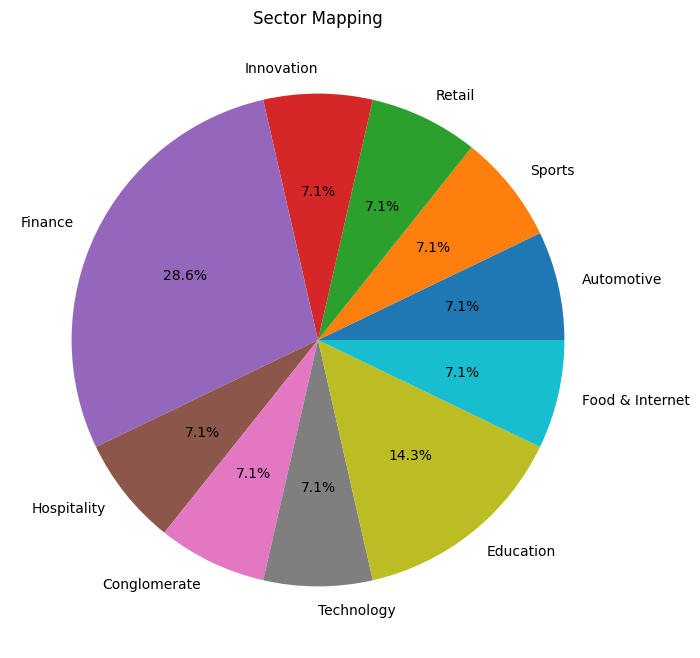

In [253]:
# Define the sector mapping dictionary
sector_mapping = {
    'FinTech': 'Finance',
    'EdTech': 'Education',
    'E-commerce': 'Retail',
    'Tech company': 'Technology',
    'Edtech': 'Education',
    'Multinational conglomerate company': 'Conglomerate',
    'Automotive': 'Automotive',
    'Financial Services': 'Finance',
    'Hospitality': 'Hospitality',
    'Insurance': 'Finance',
    'Food Delivery, Food Processing, Internet': 'Food & Internet',
    'Innovation Management': 'Innovation',
    'Fintech': 'Finance',
    'Sports': 'Sports'
}

# Count the number of occurrences of each grouped sector
grouped_sectors = list(set(sector_mapping.values()))
sector_counts = [list(sector_mapping.values()).count(sector) for sector in grouped_sectors]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=grouped_sectors, autopct='%1.1f%%')
plt.title('Sector Mapping')
plt.show()

In [254]:
columns= df.columns
print(columns)

Index(['company_brand', 'founded', 'headquarter', 'sector', 'about_company',
       'founders', 'investor', 'amount', 'series', 'year'],
      dtype='object')


In [255]:
df.head(3)

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,NaN,unknown,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,NaN,Pre-Seed Stage,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-Seed Stage,2020


### Business Questions
1. Does the location of the company influence its sector?


In [256]:
# We will use correlation test to find the relationship between headquater and  grouped sectors (sector mapping) 
# DataFrame is called df and the columns of interest are "headquater" and "sector mapping"

cross_table = pd.crosstab(df["headquarter"], df["sector"])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 54162.86484466019
p-value: 1.0


The chi-square statistic value of 54162.86484466019 indicates a strong association between 
The  chi-square statistic of 54162.86484466019 suggests a strong association, the p-value of 1.0 indicates that this association is likely due to random chance. Therefore, there is no evidence to support a meaningful relationship between the "headquarter" and "sector" variables in your dataset.


### 2.  Who were the most active investors?

In [271]:
# Investors in 'investor' column

investors = df['investor'].unique()
print(investors)

['Angel investors' 'GSF Accelerator' 'Venture Center' ...
 'US-based angel investors' 'MyPreferred Transformation' 'TPG']


In [273]:
# Aggregate  DataFrame "df" called df using "investor" and "amount" columns
aggregated_df = df.groupby("investor")["amount"].sum().reset_index()

# Print the aggregated DataFrame
print(aggregated_df)

                                                            investor  \
0                                                     -Prime Capital   
1                                                        01 Advisors   
2                                                        021 Capital   
3                                                            100X VC   
4                                                           100X.VC﻿   
5                                                 100x Entrepreneurs   
6                                                            100x VC   
7                                                             1Crowd   
8                                             1Funds Domestic Scheme   
9                                                            2000000   
10                              23 High Networth Individuals (HNIs).   
11                                                         2B Angels   
12                                                            3L